In [1]:
import os
os.chdir('../')

import warnings
warnings.filterwarnings('ignore')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os

!nvidia-smi
os.environ["CUDA_VISIBLE_DEVICES"]="2"

Mon Aug 14 11:42:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.199.02   Driver Version: 470.199.02   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100 80G...  Off  | 00000000:1B:00.0 Off |                    0 |
| N/A   43C    P0    46W / 300W |     35MiB / 80994MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100 80G...  Off  | 00000000:1C:00.0 Off |                    0 |
| N/A   

### Hyperparams

In [3]:
n_mels = 768
n_outputs = 61
n_frames = 400

In [4]:
from model.model_glowtts_sid import Model
from utils.util import *

device = 'cuda:0'

# Model
model = Model(in_dim=n_mels, enc_hidden_dim=256, out_dim=61, dec_hidden_dim=256)
model = model.to(device)
model.eval()
print('done')

done


In [5]:
!ls -lt /data/scpark/save/lips/train08.11-1/

total 14849376
-rw-rw-r-- 1 scpark scpark    111574  8월 14 11:39 events.out.tfevents.1691728600.GPUSVR11
-rw-rw-r-- 1 scpark scpark 661111453  8월 14 09:55 save_110000
-rw-rw-r-- 1 scpark scpark 661111453  8월 14 06:54 save_105000
-rw-rw-r-- 1 scpark scpark 661111453  8월 14 03:53 save_100000
-rw-rw-r-- 1 scpark scpark 661109319  8월 14 00:51 save_95000
-rw-rw-r-- 1 scpark scpark 661109319  8월 13 21:46 save_90000
-rw-rw-r-- 1 scpark scpark 661109319  8월 13 18:40 save_85000
-rw-rw-r-- 1 scpark scpark 661109319  8월 13 15:36 save_80000
-rw-rw-r-- 1 scpark scpark 661109319  8월 13 12:32 save_75000
-rw-rw-r-- 1 scpark scpark 661109319  8월 13 09:21 save_70000
-rw-rw-r-- 1 scpark scpark 661109319  8월 13 06:09 save_65000
-rw-rw-r-- 1 scpark scpark 661109319  8월 13 02:57 save_60000
-rw-rw-r-- 1 scpark scpark 661109319  8월 12 23:45 save_55000
-rw-rw-r-- 1 scpark scpark 661109319  8월 12 20:29 save_50000
-rw-rw-r-- 1 scpark scpark 661109319  8월 12 17:12 save_45000
-rw-rw-r-- 1 scpark scpark 661109319  

In [7]:
path = '/data/scpark/save/lips/train08.11-1/save_110000'
checkpoint = torch.load(path, map_location=torch.device('cpu'))    
model.load_state_dict(checkpoint['model_state_dict'], strict=True)
print('done')

done


In [8]:
!ls -lS /Storage/speech/tts/kaist-audio-book/wav/남1_동화1/

total 732912
-rw-r--r-- 1 guhyun guhyun 1277038  5월 11 19:49 141.spec.pt
-rwxrwxrwx 1 scpark scpark 1199818 11월 13  2019 1181.wav
-rwxrwxrwx 1 scpark scpark 1158070 11월 13  2019 1449.wav
-rw-r--r-- 1 guhyun guhyun 1086254  5월 11 19:49 232.spec.pt
-rw-r--r-- 1 guhyun guhyun 1065710  5월 11 19:49 231.spec.pt
-rw-r--r-- 1 guhyun guhyun  983598  5월 11 19:48 763.spec.pt
-rw-r--r-- 1 guhyun guhyun  971310  5월 11 19:49 140.spec.pt
-rw-r--r-- 1 guhyun guhyun  954929  5월 11 19:48 1801.spec.pt
-rw-r--r-- 1 guhyun guhyun  944625  5월 11 19:48 1512.spec.pt
-rw-r--r-- 1 guhyun guhyun  944625  5월 11 19:33 1805.spec.pt
-rw-r--r-- 1 guhyun guhyun  928238  5월 11 19:48 868.spec.pt
-rw-r--r-- 1 guhyun guhyun  920049  5월 11 19:48 1433.spec.pt
-rw-r--r-- 1 guhyun guhyun  920049  5월 11 19:48 2007.spec.pt
-rw-r--r-- 1 guhyun guhyun  917937  5월 11 19:33 1036.spec.pt
-rw-r--r-- 1 guhyun guhyun  917934  5월 11 19:33 257.spec.pt
-rw-r--r-- 1 guhyun guhyun  913841  5월 11 19:48 1098.spec.pt
-rwxrwxrwx 1 scpark scpark

-rwxrwxrwx 1 scpark scpark  186288 11월 13  2019 75.wav
-rwxrwxrwx 1 scpark scpark  186180 11월 13  2019 1248.wav
-rwxrwxrwx 1 scpark scpark  186140 11월 13  2019 1038.wav
-rwxrwxrwx 1 scpark scpark  186048 11월 13  2019 1485.wav
-rwxrwxrwx 1 scpark scpark  185916 11월 13  2019 576.wav
-rwxrwxrwx 1 scpark scpark  185864 11월 13  2019 1003.wav
-rwxrwxrwx 1 scpark scpark  185822 11월 13  2019 233.wav
-rwxrwxrwx 1 scpark scpark  185754 11월 13  2019 1295.wav
-rwxrwxrwx 1 scpark scpark  185700 11월 13  2019 499.wav
-rwxrwxrwx 1 scpark scpark  185578 11월 13  2019 1606.wav
-rwxrwxrwx 1 scpark scpark  185558 11월 13  2019 564.wav
-rwxrwxrwx 1 scpark scpark  185054 11월 13  2019 821.wav
-rwxrwxrwx 1 scpark scpark  184928 11월 13  2019 693.wav
-rwxrwxrwx 1 scpark scpark  184872 11월 13  2019 657.wav
-rwxrwxrwx 1 scpark scpark  184776 11월 13  2019 1484.wav
-rwxrwxrwx 1 scpark scpark  184696 11월 13  2019 1988.wav
-rwxrwxrwx 1 scpark scpark  184692 11월 13  2019 1631.wav
-rwxrwxrwx 1 scpark scpark  184552 11월 1

In [9]:
import fairseq
from torchaudio.transforms import Resample

ckpt_path = "/Storage/speech/pretrained/contentvec/checkpoint_best_legacy_500.pt"
hubert, cfg, task = fairseq.checkpoint_utils.load_model_ensemble_and_task([ckpt_path])
hubert = hubert[0]
hubert = hubert.to(device)
hubert.eval()

def get_hubert_feature(wav):
    with torch.no_grad():
        # (b, t, c)
        wav = torch.Tensor(wav[None, :]).to(device)
        feature = hubert.extract_features(wav, output_layer=12)[0]
        return feature.transpose(1, 2)
print('done')

2023-08-14 11:42:51 | INFO | fairseq.tasks.hubert_pretraining | current directory is /home/scpark/projects/wav2face
2023-08-14 11:42:51 | INFO | fairseq.tasks.hubert_pretraining | HubertPretrainingTask Config {'_name': 'hubert_pretraining', 'data': 'metadata', 'fine_tuning': False, 'labels': ['km'], 'label_dir': 'label', 'label_rate': 50.0, 'sample_rate': 16000, 'normalize': False, 'enable_padding': False, 'max_keep_size': None, 'max_sample_size': 250000, 'min_sample_size': 32000, 'single_target': False, 'random_crop': True, 'pad_audio': False}
2023-08-14 11:42:51 | INFO | fairseq.models.hubert.hubert | HubertModel Config: {'_name': 'hubert', 'label_rate': 50.0, 'extractor_mode': default, 'encoder_layers': 12, 'encoder_embed_dim': 768, 'encoder_ffn_embed_dim': 3072, 'encoder_attention_heads': 12, 'activation_fn': gelu, 'layer_type': transformer, 'dropout': 0.1, 'attention_dropout': 0.1, 'activation_dropout': 0.0, 'encoder_layerdrop': 0.05, 'dropout_input': 0.1, 'dropout_features': 0.1,

done


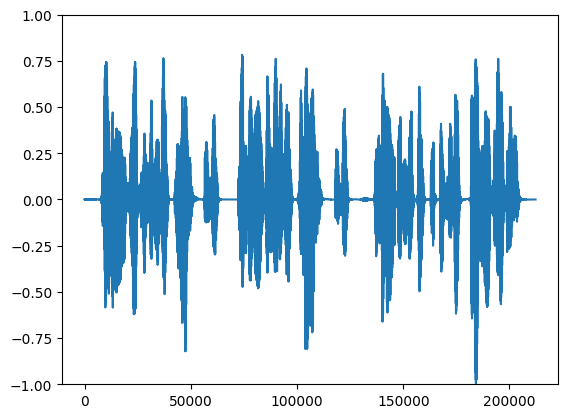

In [10]:
import matplotlib.pyplot as plt
wav_file = '/Storage/speech/tts/kaist-audio-book/wav/남1_동화1/1181.wav'
wav, _ = librosa.load(wav_file, sr=16000, res_type='polyphase')
wav = wav / max(abs(wav))

plt.plot(wav)
plt.ylim([-1, 1])
plt.show()

In [14]:
def get_blendshape(wav, sid):
    feature = get_hubert_feature(wav)
    feature = F.interpolate(feature, scale_factor=3/5, mode='linear')
    sid = torch.Tensor([sid]).long().to(device)
    with torch.no_grad():
        y = model.inference(feature, sid=sid, temperature=0.1)
    y = y[0].data.cpu().numpy()
    return y
    

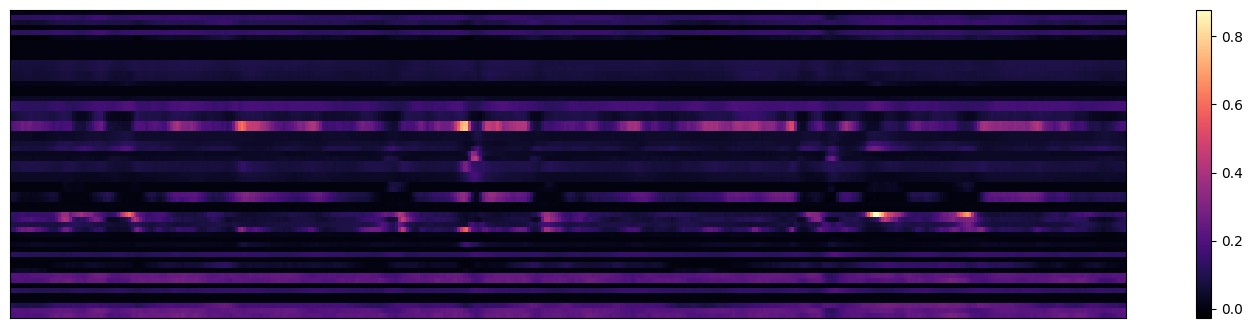

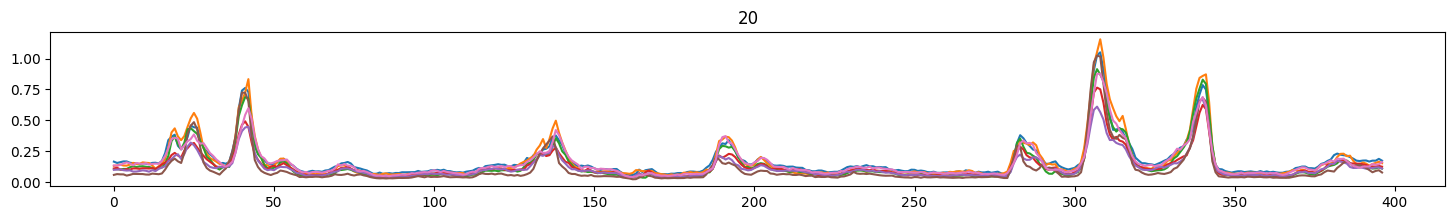

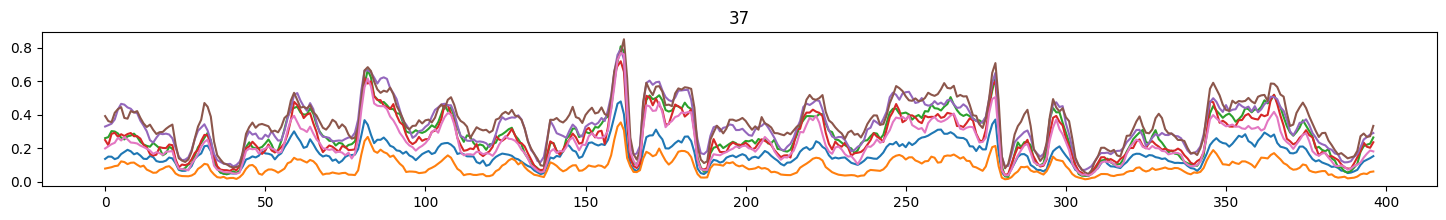

In [15]:
ys = []
for sid in range(1, 8):
    y = get_blendshape(wav, sid)
    ys.append(y)
    
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=[18, 4])
librosa.display.specshow(y, cmap='magma')
plt.colorbar()
plt.show()

for i in [20, 37]:
    plt.figure(figsize=[18, 2])
    plt.title(str(i))
    for sid in range(len(ys)):
        plt.plot(ys[sid][i])
    plt.show()


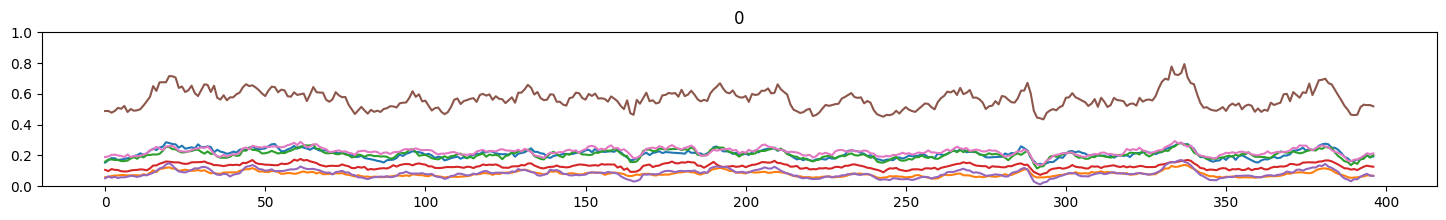

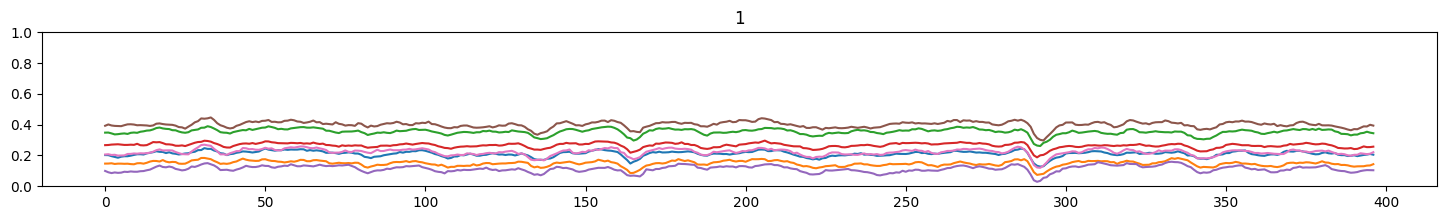

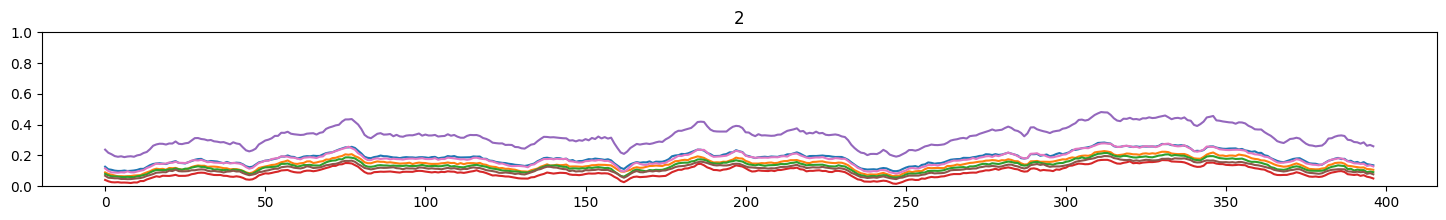

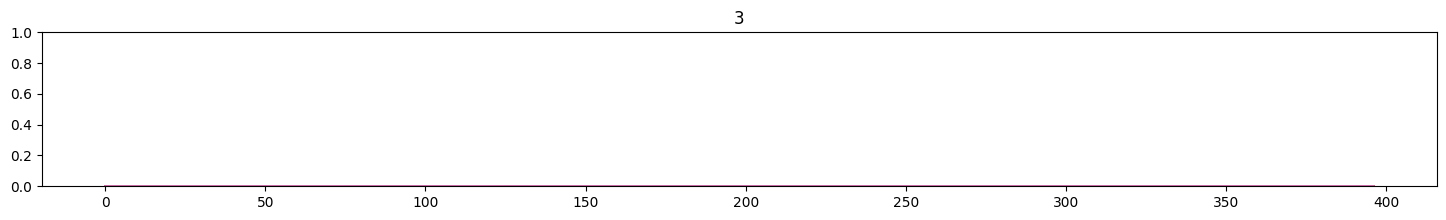

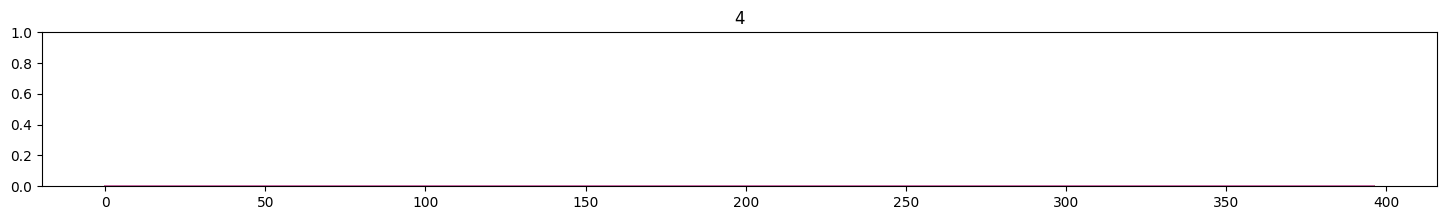

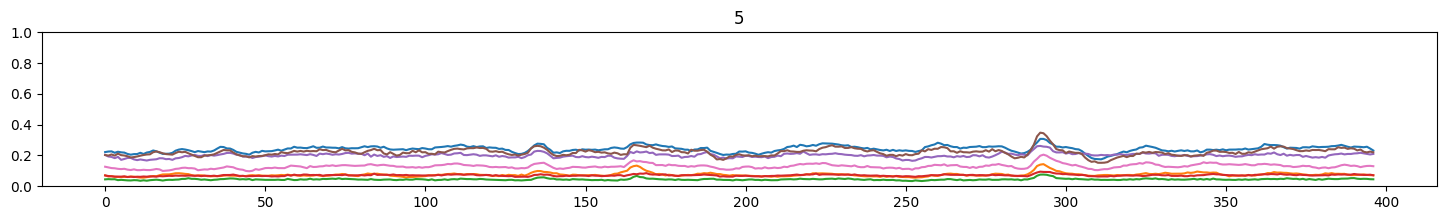

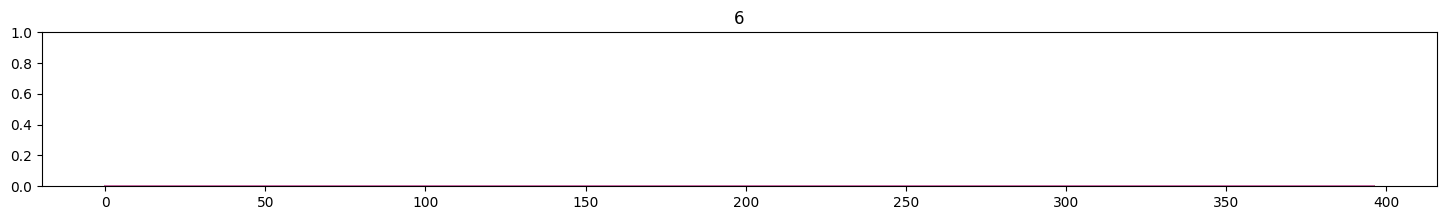

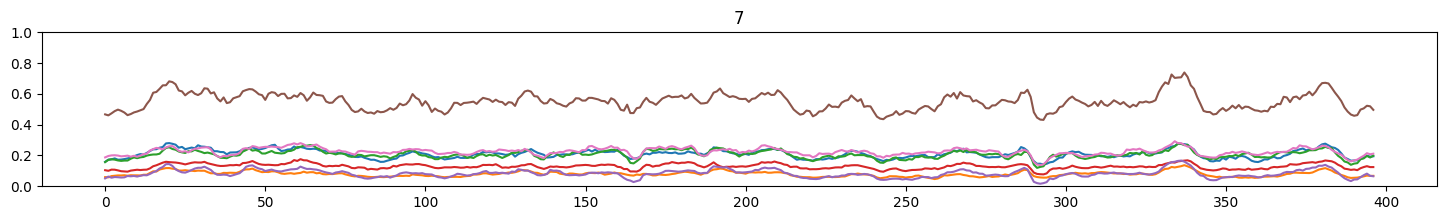

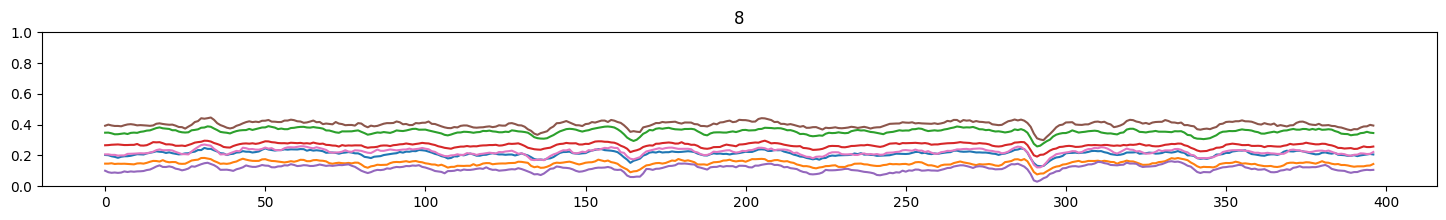

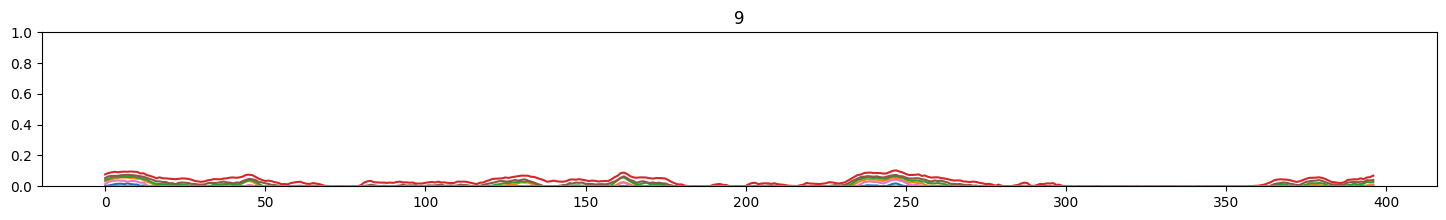

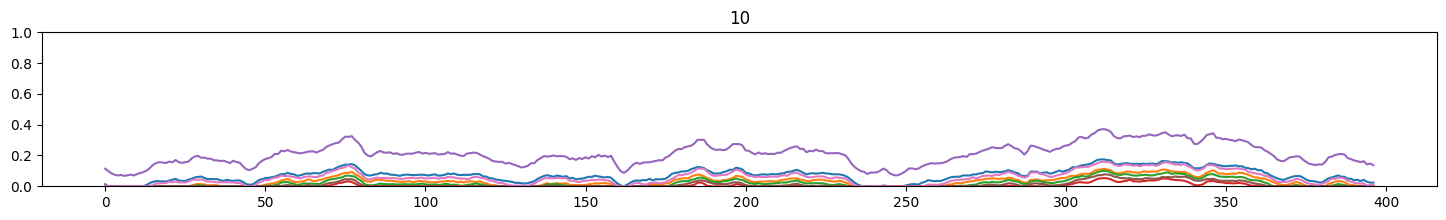

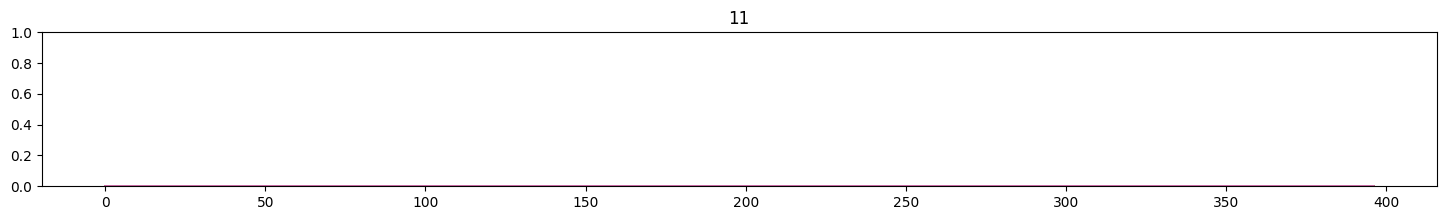

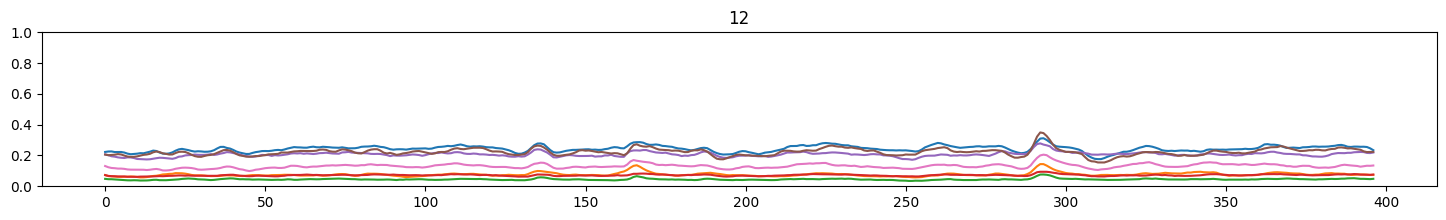

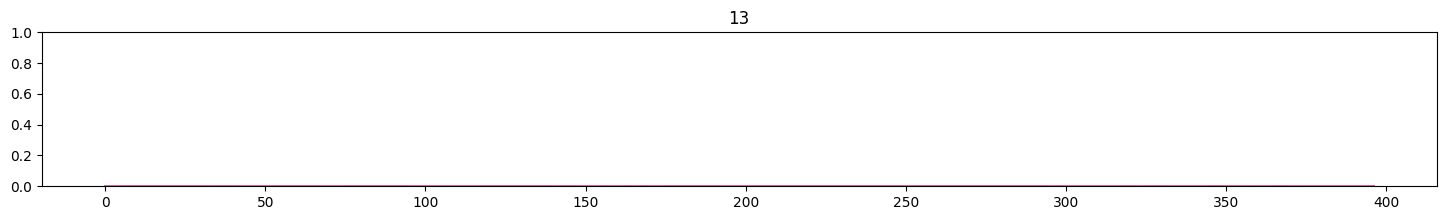

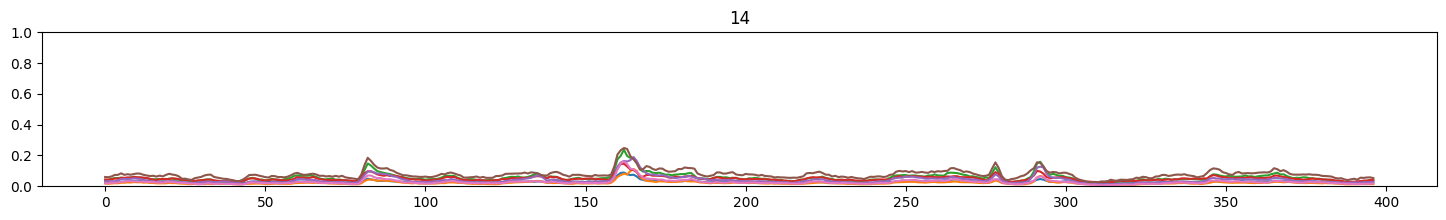

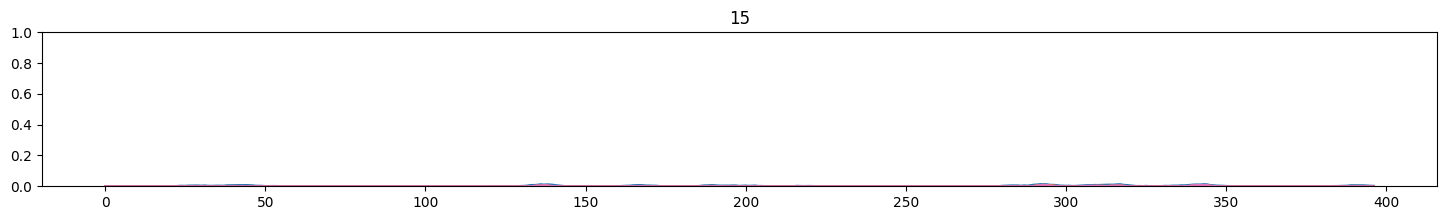

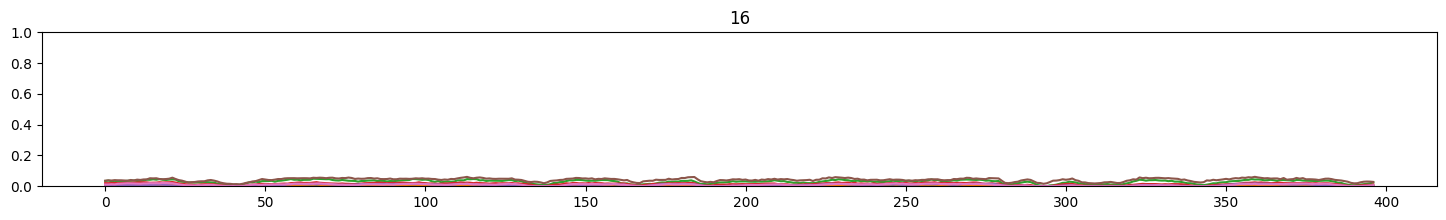

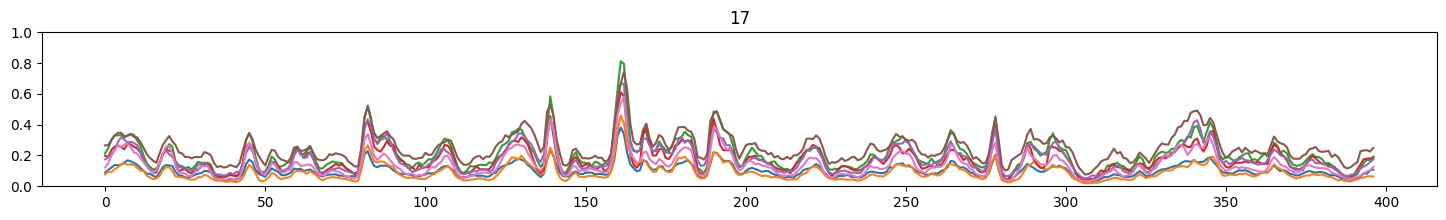

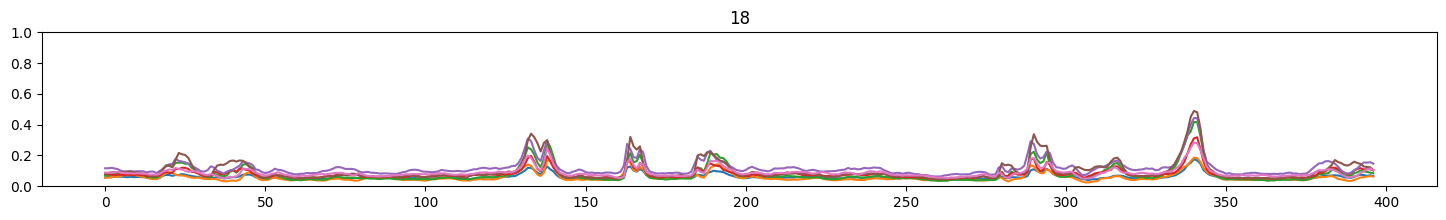

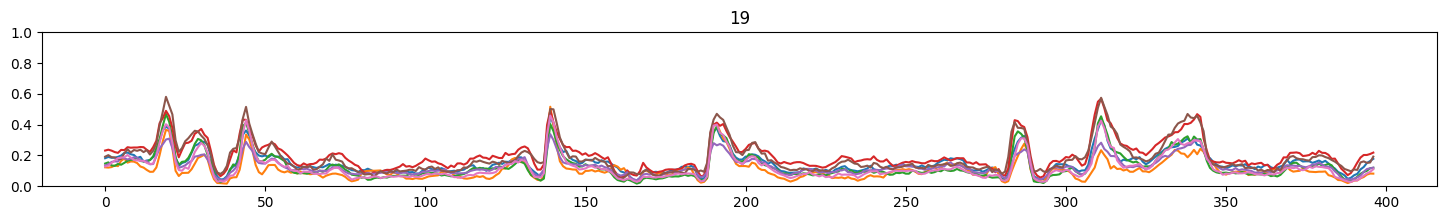

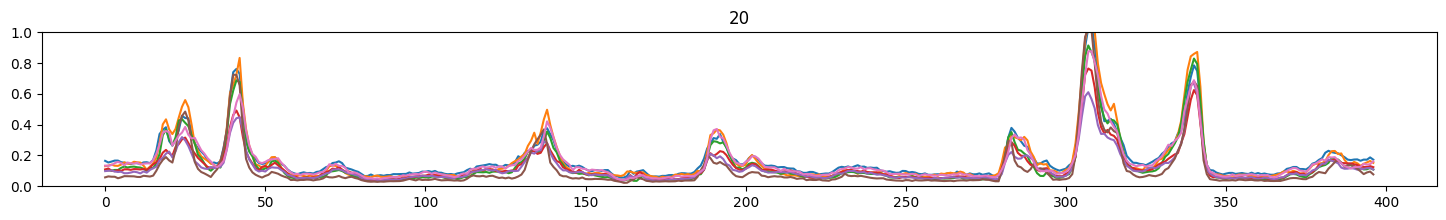

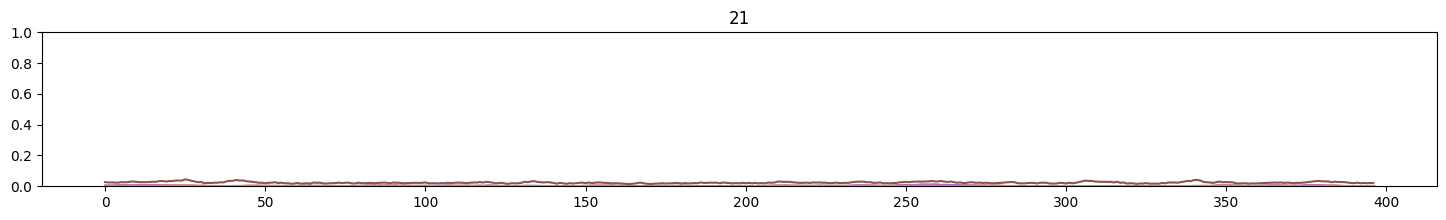

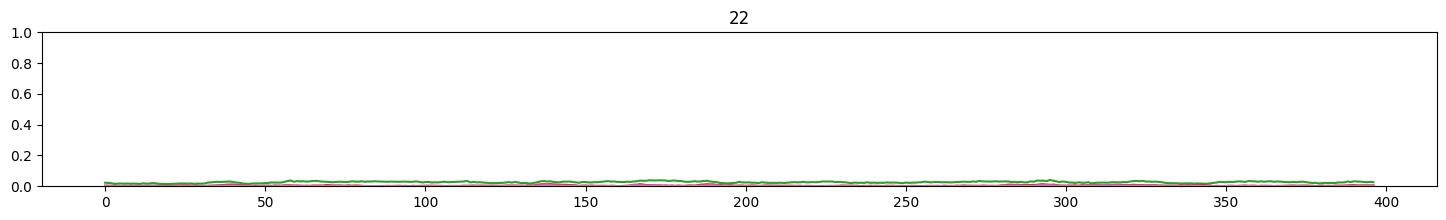

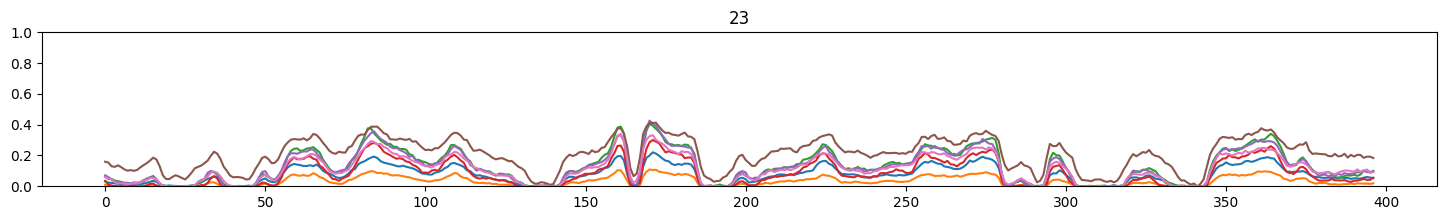

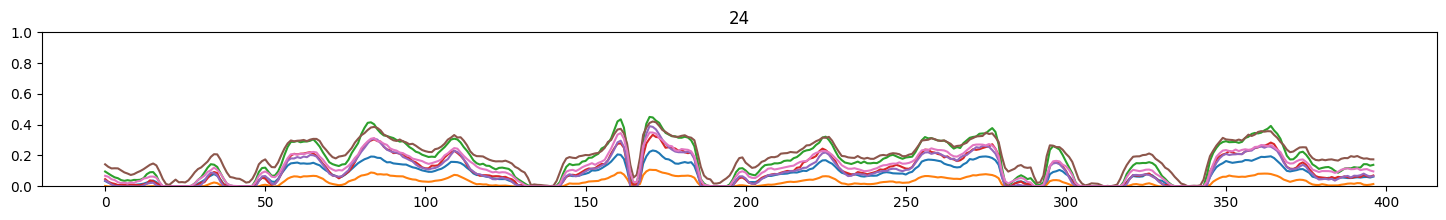

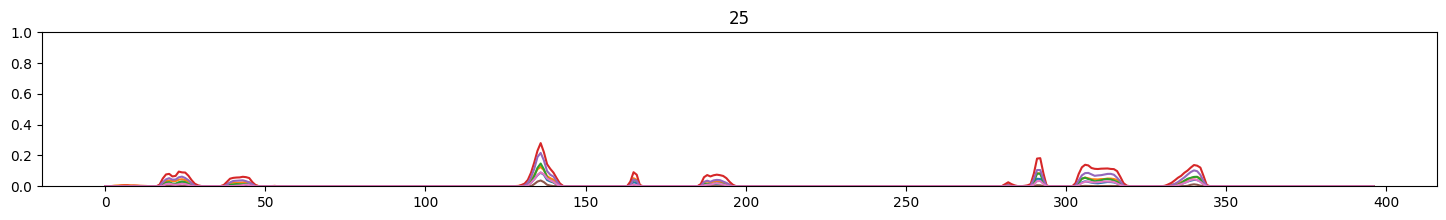

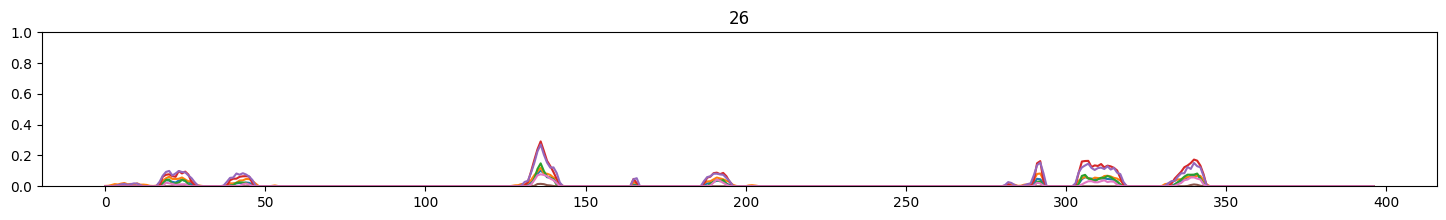

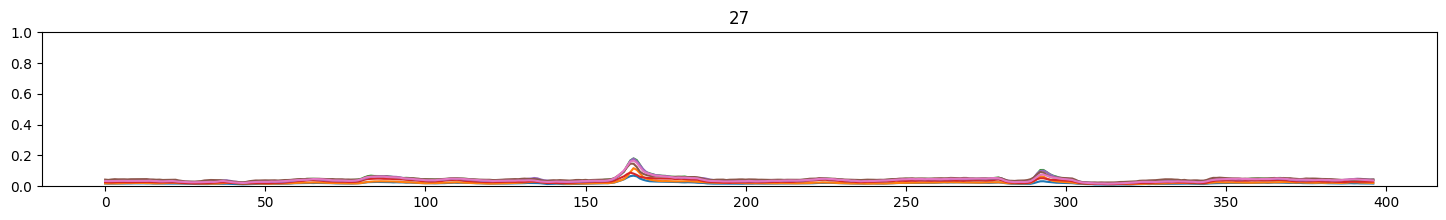

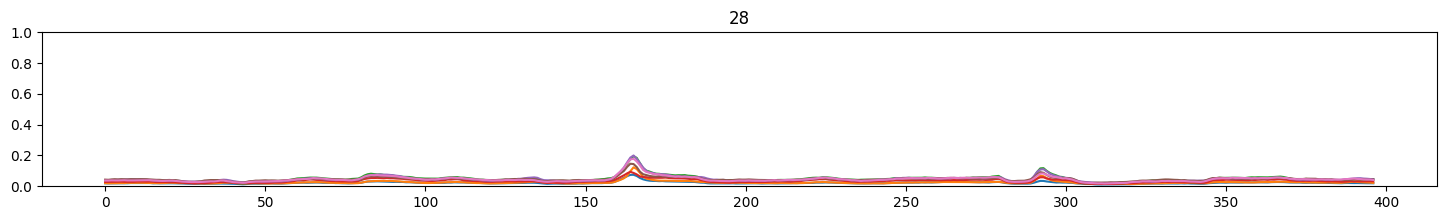

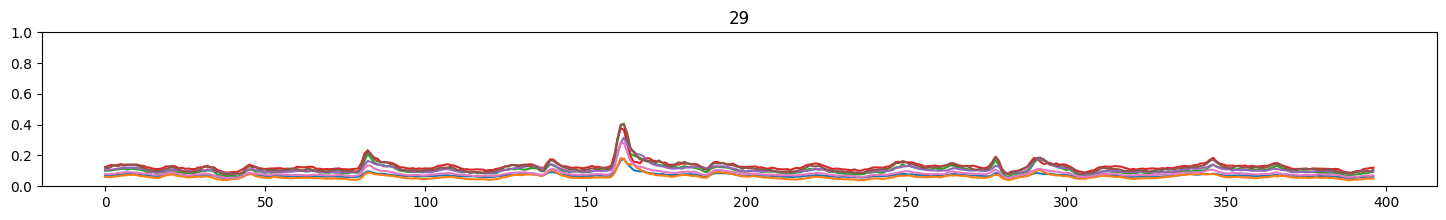

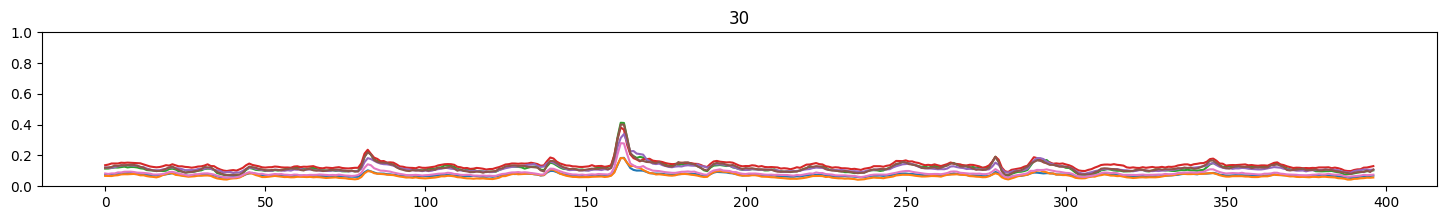

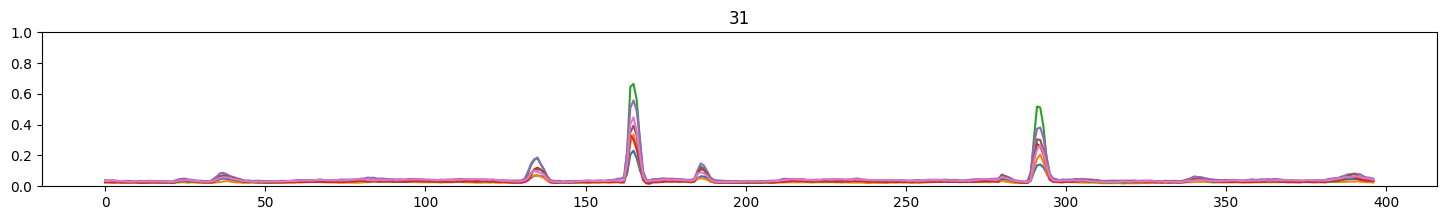

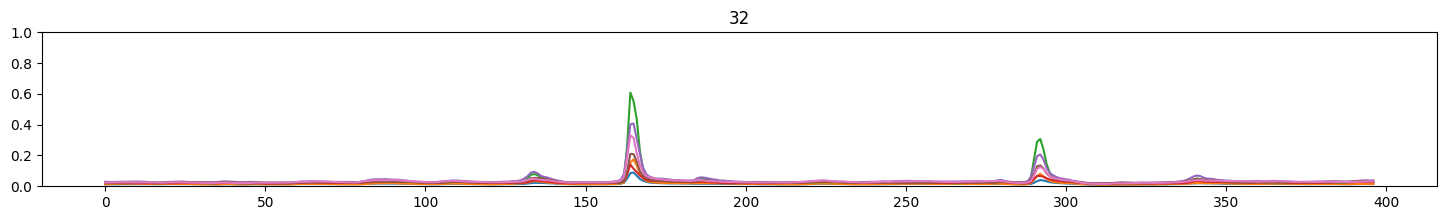

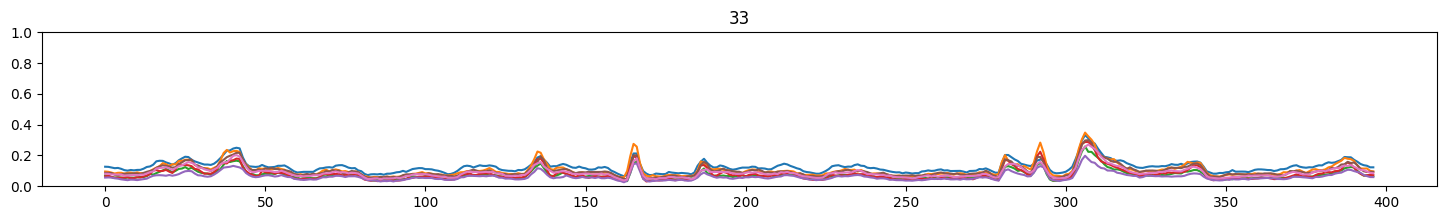

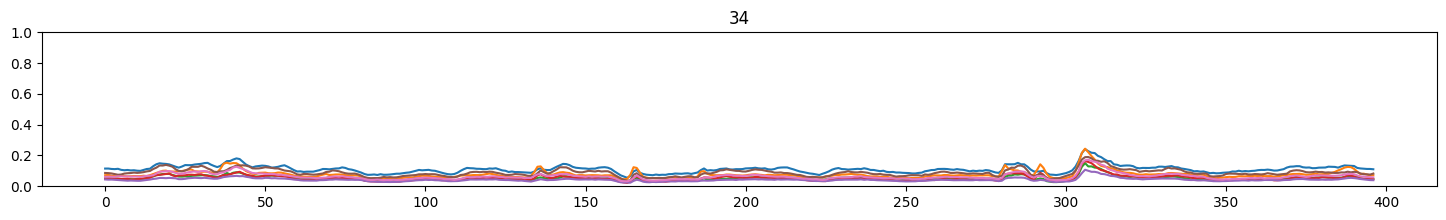

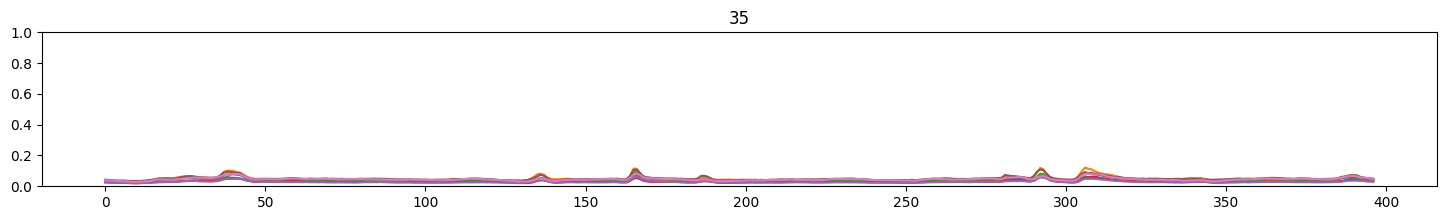

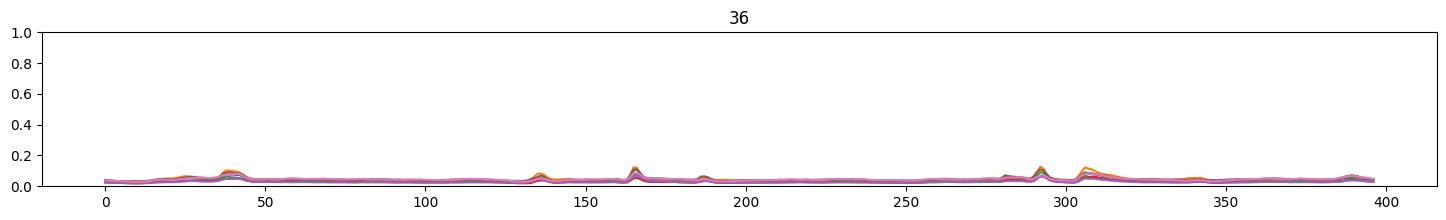

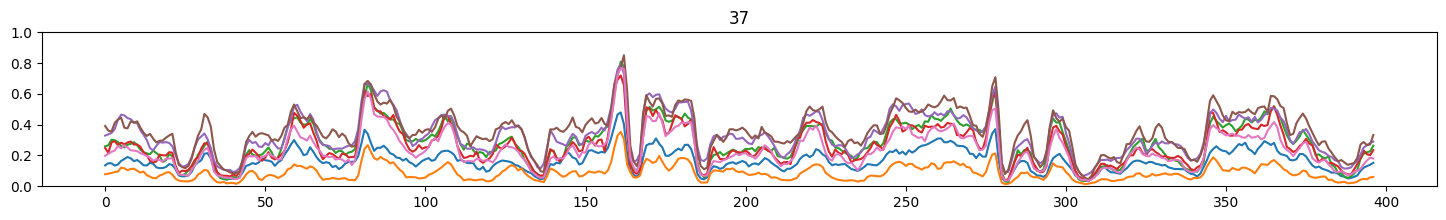

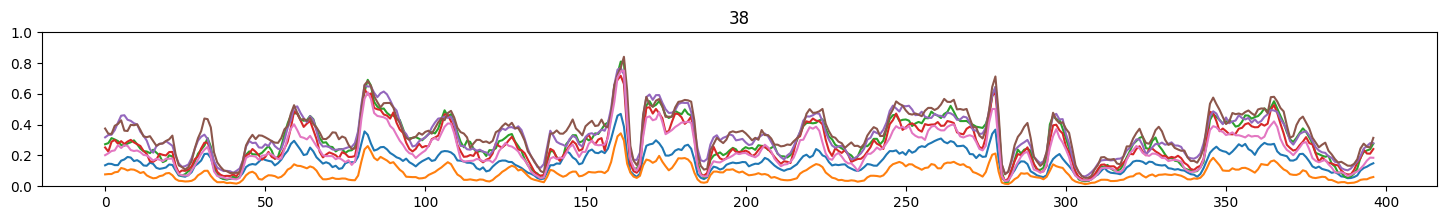

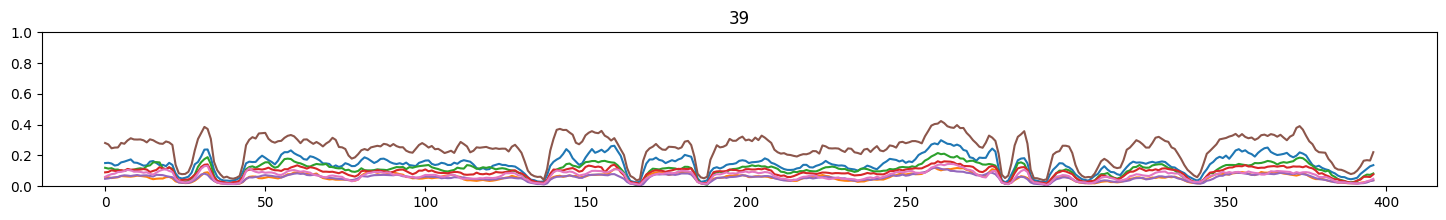

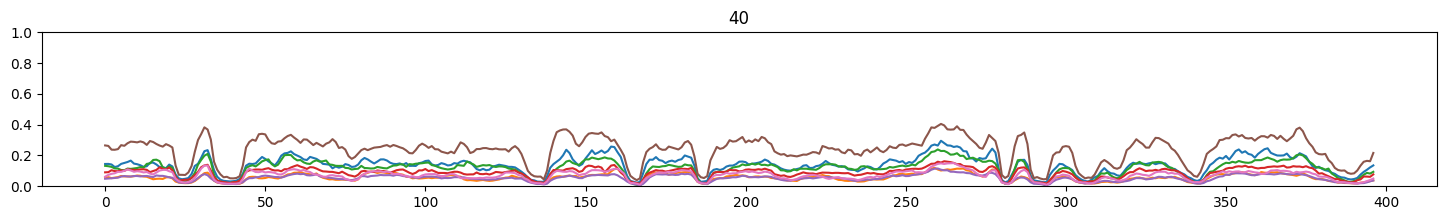

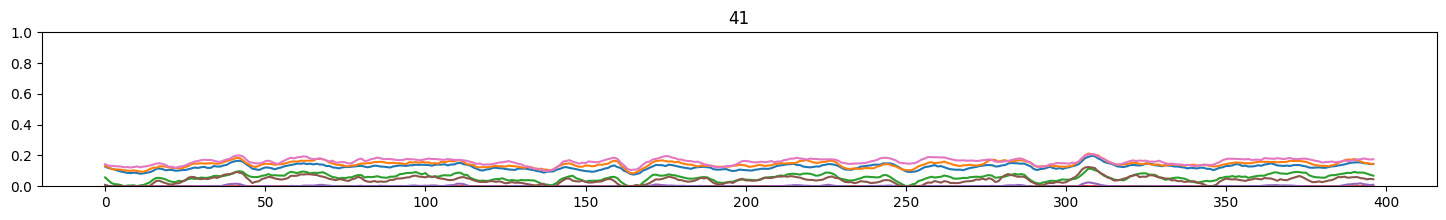

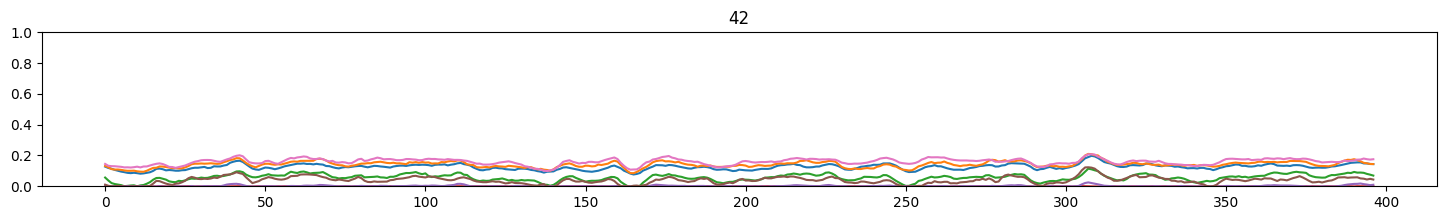

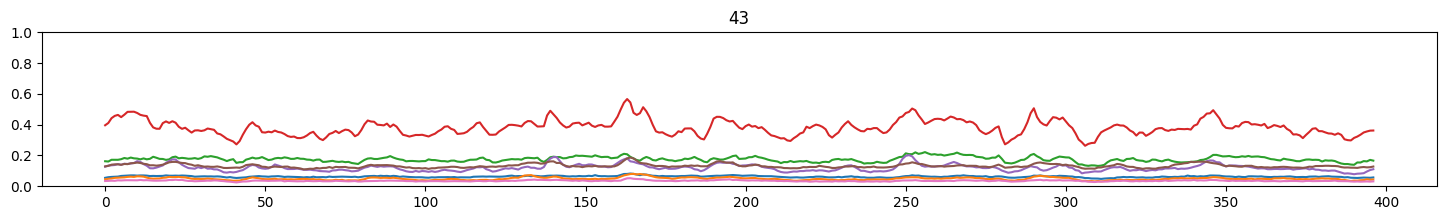

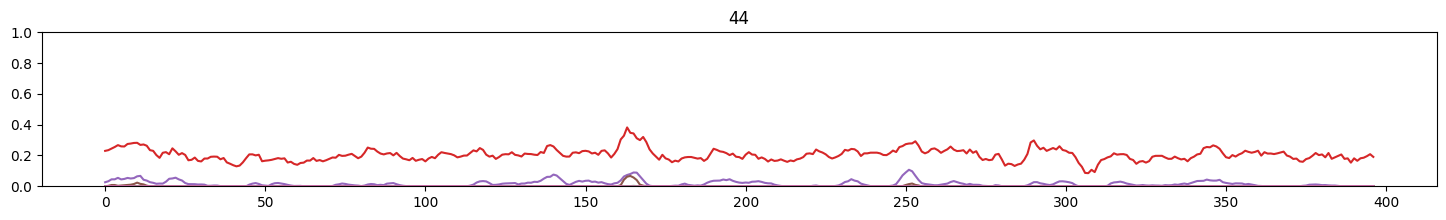

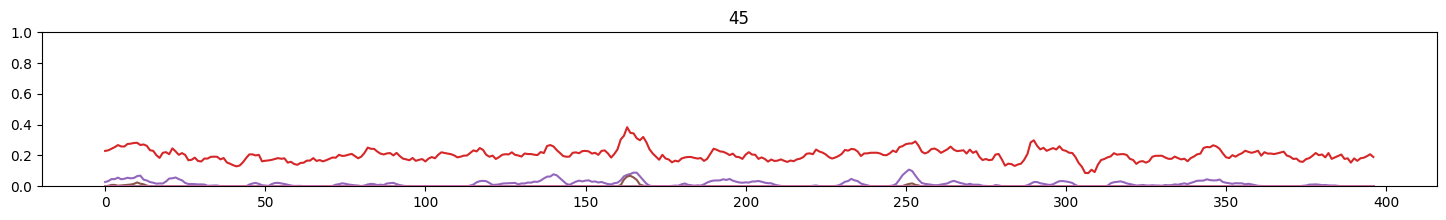

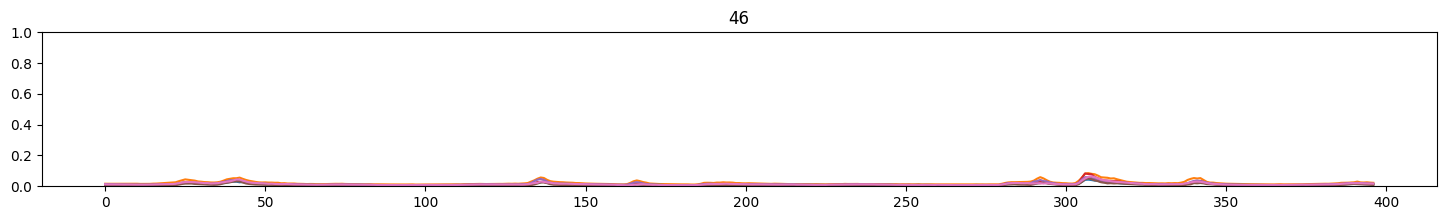

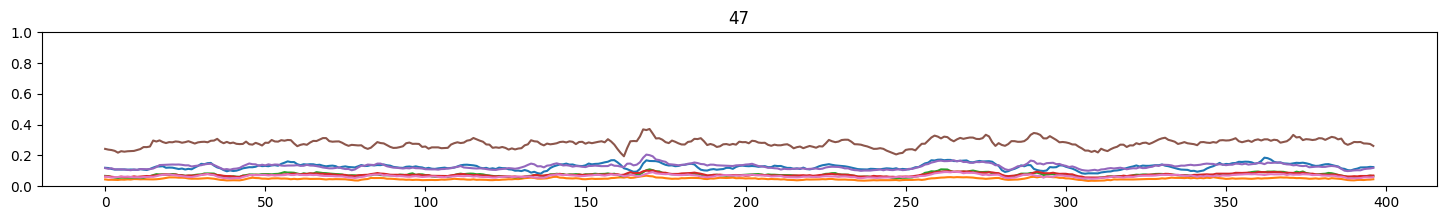

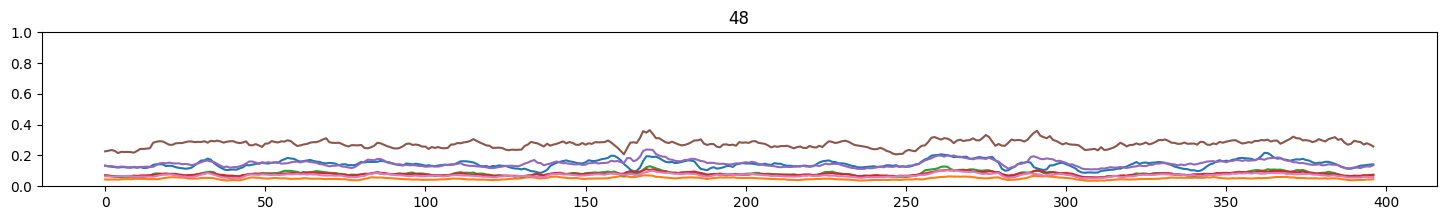

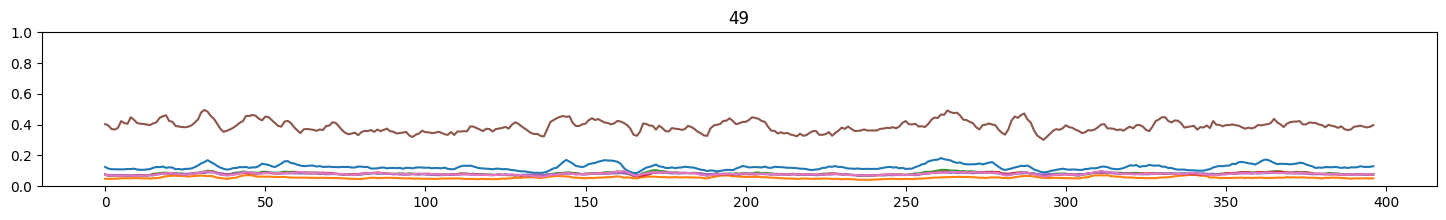

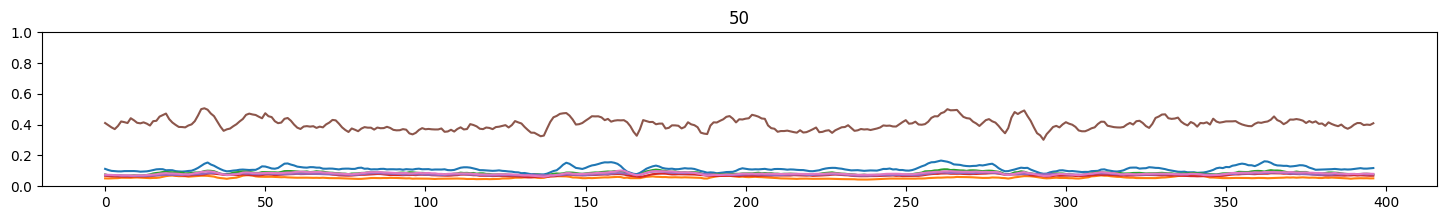

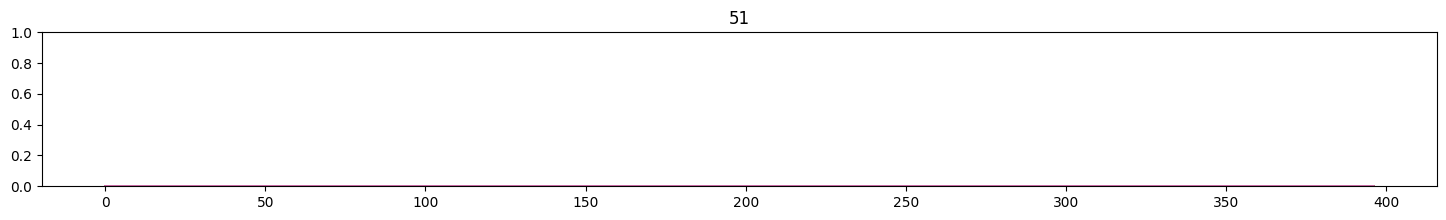

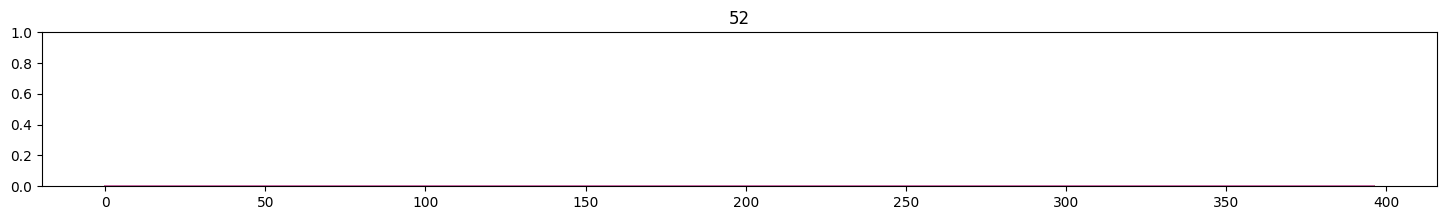

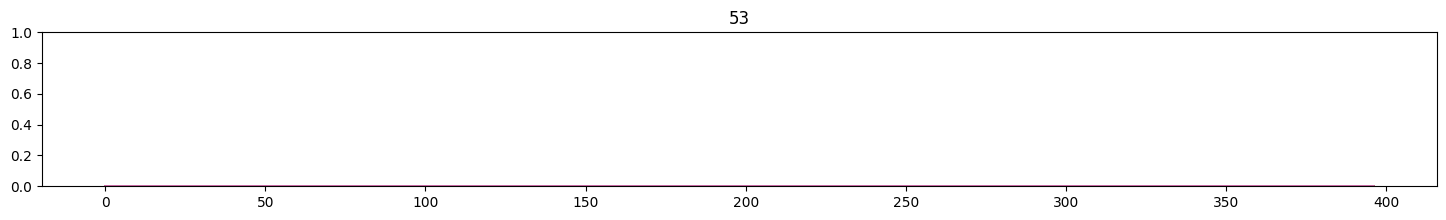

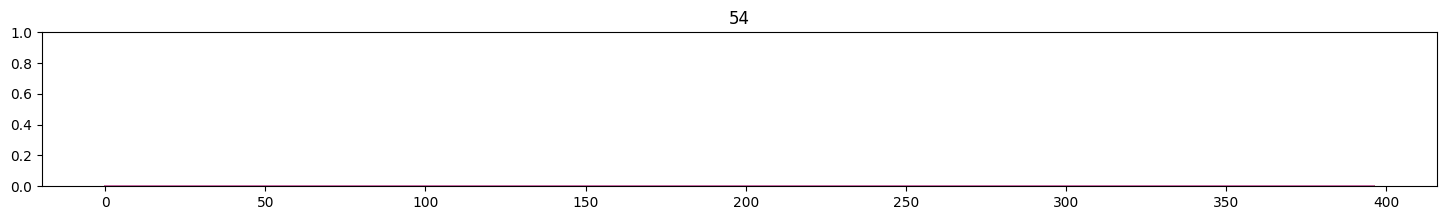

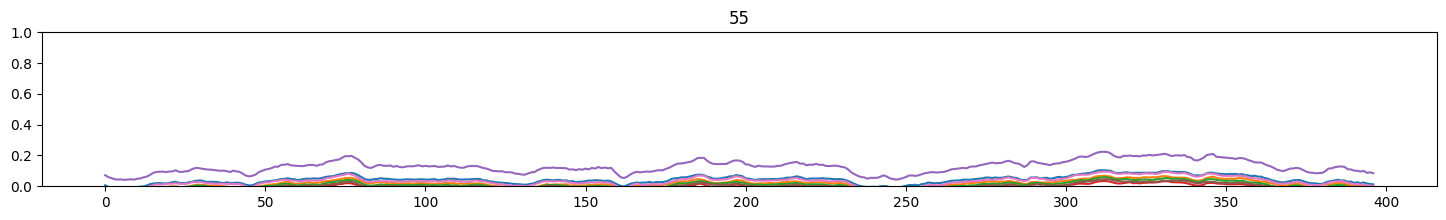

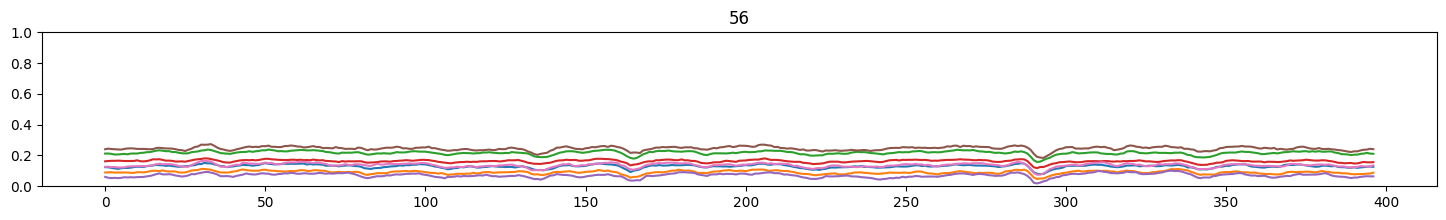

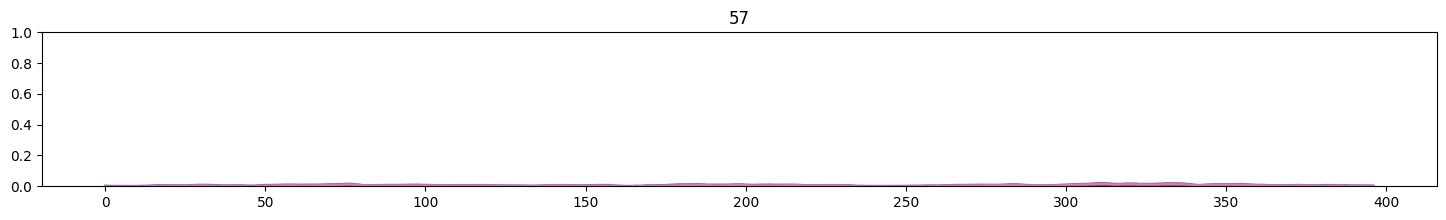

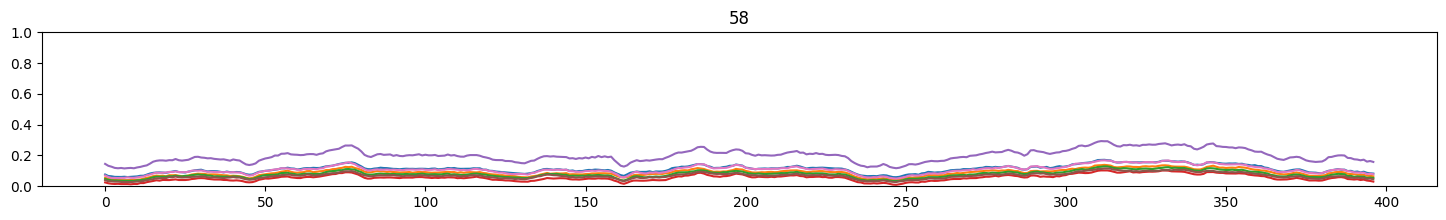

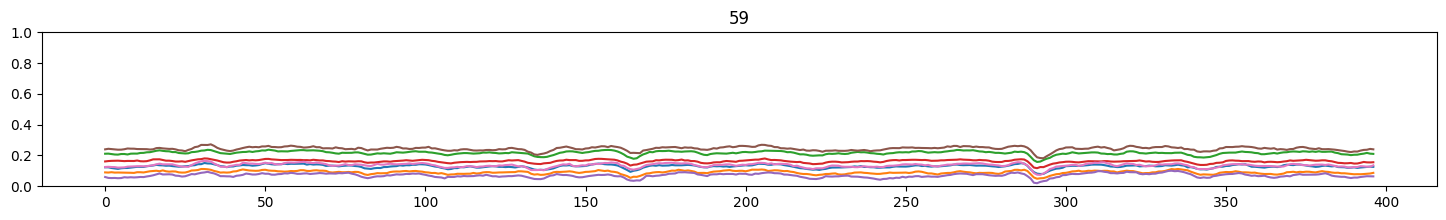

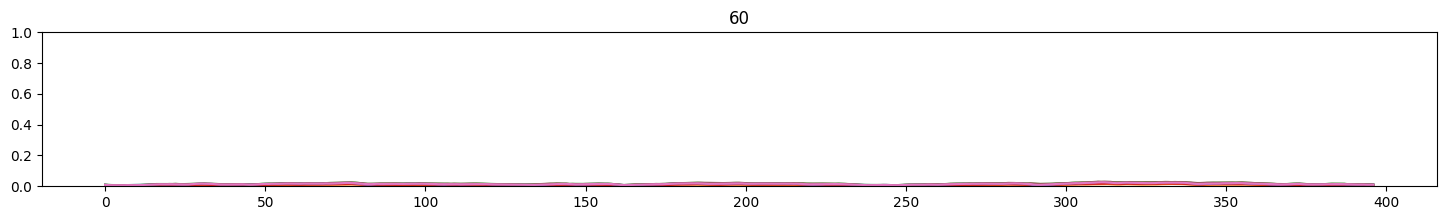

In [16]:
for i in range(0, 61):
    plt.figure(figsize=[18, 2])
    plt.title(str(i))
    for sid in range(len(ys)):
        plt.plot(ys[sid][i])
        plt.ylim([0, 1])
    plt.show()
